## JUMIA ONLINE SHOPPERS INTENTION 
- PRINCESS IGE

#### GOAL OF THE PROJECT
The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website. 


#### FEATURES OF THE DATASET AND THEIR MEANING

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.





In [1]:
#import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### DATA INSPECTION

In [2]:
#import dataset
data = pd.read_csv('online_shoppers_intention.csv')
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [3]:
data.tail(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12321,0,0.00,0,0.0,6,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,8,4,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.00,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.00,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.00,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [4]:
data.shape

(12330, 18)

In [5]:
data.size

221940

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# Creating of a Copy of the original data for data exploration and manipulation
df = data.copy()

In [8]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [9]:
# checking for null values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [11]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [12]:
df.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [13]:
df.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [14]:
df.Weekend.value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [15]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [16]:
df.SpecialDay.value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [17]:
df.ProductRelated.value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

In [18]:
PR = df[['Revenue', 'ProductRelated']]
PR.head()

,Revenue,ProductRelated
0,False,1
1,False,2
2,False,1
3,False,2
4,False,10


In [19]:
PR.tail()

,Revenue,ProductRelated
12325,False,53
12326,False,5
12327,False,6
12328,False,15
12329,False,3


In [20]:
PR.describe()

,ProductRelated
count,12330.000000
mean,31.731468
std,44.475503
min,0.000000
25%,7.000000
50%,18.000000
75%,38.000000
max,705.000000


In [21]:
PR[['Revenue', 'ProductRelated']].value_counts().sort_values(ascending=False)[:100]

Revenue  ProductRelated
False    1                 609
         2                 445
         3                 433
         4                 386
         6                 372
                          ... 
True     3                  25
False    81                 25
         79                 25
         67                 24
True     33                 24
Length: 100, dtype: int64

In [22]:
df.ProductRelated.value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

In [23]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

### INSPECTION RESULT

- The dataset was gotten from 10Alytics.

- There are 12330 rows and 18 columns.

- There are no null values 

- The dataset is clean and quite organised

- Our target class (Revenue) is not symmetric. Less visits to the online store's site ended in revenue.



In [24]:
df.Administrative_Duration.min()

0.0

In [25]:
df.Administrative_Duration.max()

3398.75

In [26]:
df.Administrative_Duration.describe()

count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64

In [27]:
df.Informational_Duration.describe()

count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

In [28]:
df.ProductRelated_Duration.describe()

count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157214
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

In [29]:
df.BounceRates.describe()

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

In [30]:
# operating systems
df.OperatingSystems.unique()

array([1, 2, 4, 3, 7, 6, 8, 5], dtype=int64)

In [31]:
# Browser
df.Browser.unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64)

In [32]:
# Region
df.Region.unique()

array([1, 9, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [33]:
# Traffic type
df.TrafficType.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20], dtype=int64)

In [34]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [35]:
df.max()

Administrative                            27
Administrative_Duration              3398.75
Informational                             24
Informational_Duration              2549.375
ProductRelated                           705
ProductRelated_Duration          63973.52223
BounceRates                              0.2
ExitRates                                0.2
PageValues                        361.763742
SpecialDay                               1.0
Month                                    Sep
OperatingSystems                           8
Browser                                   13
Region                                     9
TrafficType                               20
VisitorType                Returning_Visitor
Weekend                                 True
Revenue                                 True
dtype: object

In [36]:
df.min()

Administrative                       0
Administrative_Duration            0.0
Informational                        0
Informational_Duration             0.0
ProductRelated                       0
ProductRelated_Duration            0.0
BounceRates                        0.0
ExitRates                          0.0
PageValues                         0.0
SpecialDay                         0.0
Month                              Aug
OperatingSystems                     1
Browser                              1
Region                               1
TrafficType                          1
VisitorType                New_Visitor
Weekend                          False
Revenue                          False
dtype: object

In [37]:
df.PageValues.value_counts()

0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: PageValues, Length: 2704, dtype: int64

In [38]:
df.PageValues.describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

### DATA VISUALIZATION

In [39]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<AxesSubplot:title={'center':'Number of administrative pages users visited'}, xlabel='Administrative', ylabel='count'>

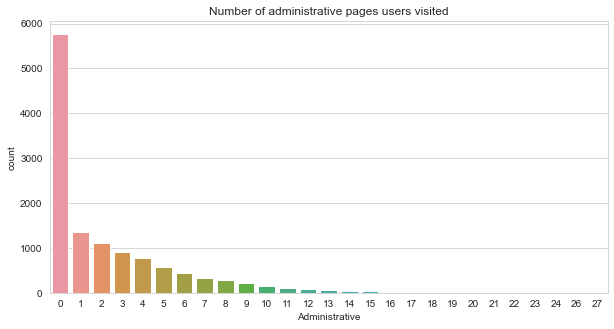

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.title('Number of administrative pages users visited')
sns.countplot( x = df['Administrative'])

- This shows that a high number of online shoppers visited zero administrative pages and the highest number of administrative page visited is one. 

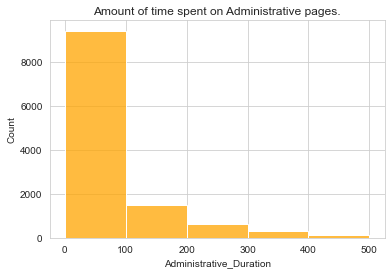

In [41]:
sns.histplot(df['Administrative_Duration'],bins = [0,100,200,300,400,500], color='Orange')
plt.title('Amount of time spent on Administrative pages.')
plt.show()

- the highest amount of time spent on administrative pages is between 0-100

<AxesSubplot:title={'center':'Number of informational pages users visited'}, xlabel='Informational', ylabel='count'>

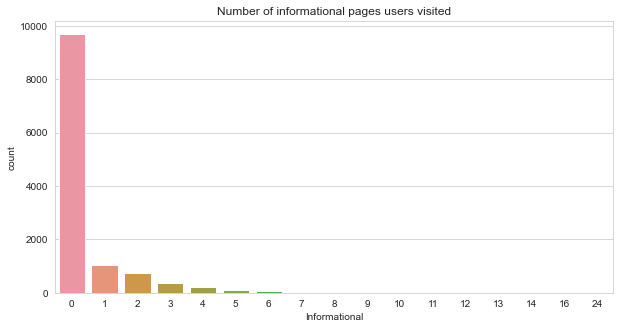

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.title('Number of informational pages users visited')
sns.countplot( x = df['Informational'])

- Most online shoppers visited no informational page.

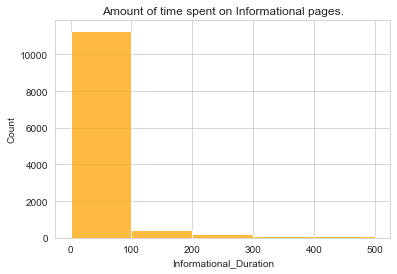

In [43]:
sns.histplot(df['Informational_Duration'],bins = [0,100,200,300,400,500], color='Orange')
plt.title('Amount of time spent on Informational pages.')
plt.show()

- the highest amount of time spent on informational pages is between 0-100

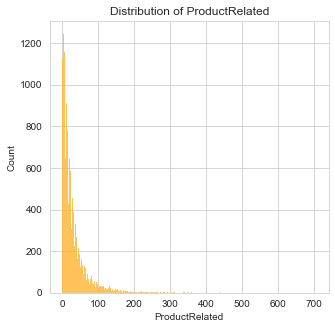

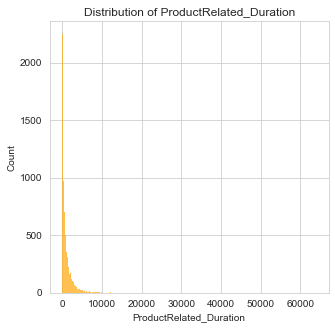

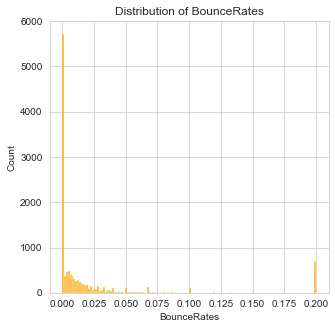

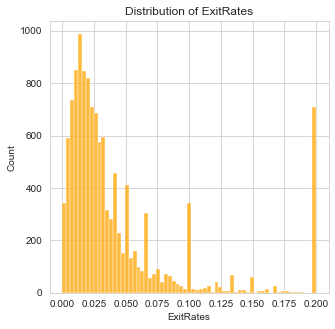

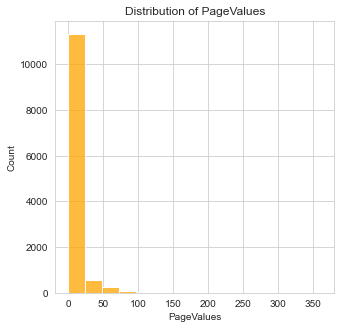

In [45]:
continous_clm = ['ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates' ,'PageValues' ]
for i in continous_clm:
        plt.figure(figsize=(5,5))
        sns.histplot(df[i], color='orange')
        plt.title('Distribution of {}'.format(i))
        plt.show()

**The graphs above show the following:**
- The highest amount of porduct related pages visited were between 0-100.
- Shoppers mostly spent zero or little time on product related pages
- The bounce rates were relatively low in comparison to exit rates which were on the high side although, they have the same maximum value of 0.200. Evidently, the percentage of visitors who enter the website through a particular page and exit without triggering any additional tasks is lower than the percentage of page views on the website that end at that specific page.  
- The highest distribution of page values were between 0-25

([<matplotlib.patches.Wedge at 0x1c058c29af0>,
 [Text(0.7855387727390274, 0.9071542517806235, 'May'),
  Text(-0.9454245851456541, 0.7390347446515407, 'Nov'),
  Text(-0.9996070378891804, -0.6639169901444146, 'Mar'),
  Text(-0.06442568905333718, -1.098111711343615, 'Dec'),
  Text(0.5478140040843684, -0.9538866897745516, 'Oct'),
  Text(0.7699499718448591, -0.785606161416839, 'Sep'),
  Text(0.9255028210969837, -0.5945120084081774, 'Aug'),
  Text(1.033085511573946, -0.3778019663474489, 'Jul'),
  Text(1.084670329545324, -0.18300348686306103, 'June'),
  Text(1.0987913709199795, -0.05155117061515264, 'Feb')],
 [Text(0.45823095076443265, 0.529173313538697, '27.28'),
  Text(-0.5514976746682981, 0.43110360104673207, '24.31'),
  Text(-0.5831041054353552, -0.38728491091757516, '15.47'),
  Text(-0.03514128493818391, -0.5989700243692445, '14.01'),
  Text(0.2988076385914737, -0.520301830786119, '4.45'),
  Text(0.4199727119153777, -0.42851245168191215, '3.63'),
  Text(0.5048197205983547, -0.32427927731

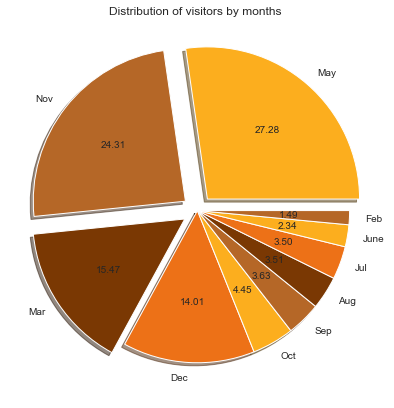

In [46]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Distribution of visitors by months ')
plt.pie(x = df['Month'].value_counts(),
       labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'],
       autopct='%.2f',
       colors=['#fcae1e','#b56727','#7a3803','#ed7117'],
       shadow = True,
       explode = (0.1,0.1,0.1,0,0,0,0,0,0,0))

- May is the month with the highest percentage of visitors while February has the lowest percentage of visitors. 

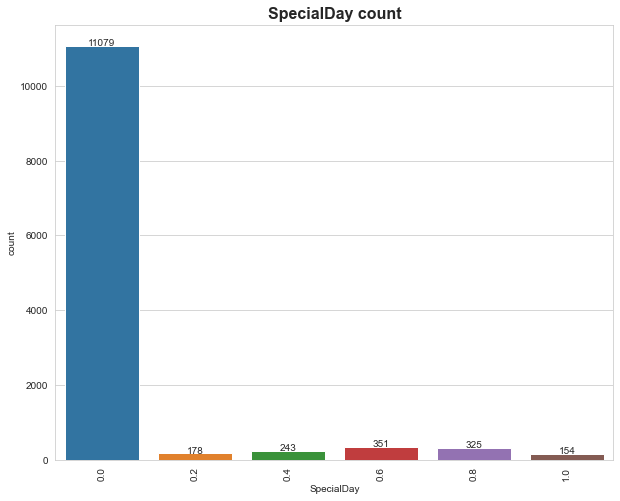

In [47]:
fig, ax1 = plt.subplots(figsize = (10,8))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="SpecialDay", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('SpecialDay count', weight='bold').set_fontsize(16)

- Most browsing dates were not close to special days.

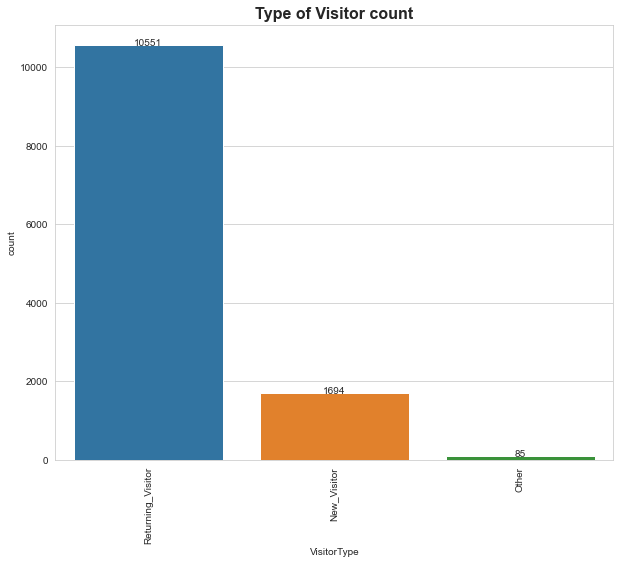

In [48]:
fig, ax1 = plt.subplots(figsize = (10,8))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="VisitorType", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Type of Visitor count', weight='bold').set_fontsize(16)

- Most visitors to the sites were returning visitors. Only 1694 were new visitors. 

([<matplotlib.patches.Wedge at 0x1c0588ed6a0>,
 [Text(-1.0788208079242065, 0.525495636889368, 'Returning_Visitor'),
  Text(1.0671878754415025, -0.5487349437667082, 'New_Visitor'),
  Text(1.1997185885832733, -0.025986692897690122, 'Other')],
 [Text(-0.6293121379557871, 0.306539121518798, '85.57'),
  Text(0.6225262606742097, -0.32009538386391306, '13.74'),
  Text(0.6998358433402426, -0.015158904190319237, '0.69')])

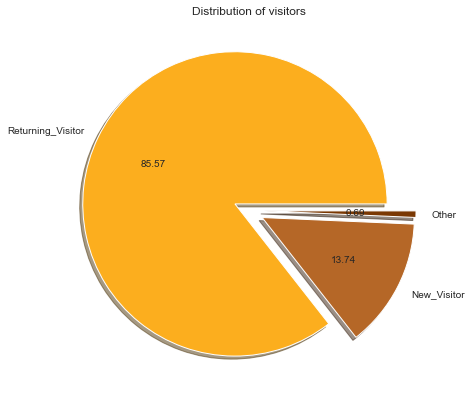

In [49]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Distribution of visitors')
plt.pie(x = df['VisitorType'].value_counts(),
       labels = ['Returning_Visitor', 'New_Visitor', 'Other'] ,
       autopct='%.2f',
       colors=['#fcae1e','#b56727','#7a3803','#ed7117'],
       shadow = True,
       explode = (0.1,0.1,0.1))

- 85.57% of the visitors to the site were returning visitor. 

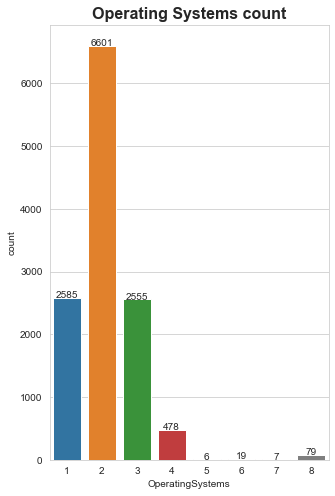

In [50]:
fig, ax1 = plt.subplots(figsize = (5,8))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="OperatingSystems", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation= 360)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Operating Systems count', weight='bold').set_fontsize(16)

- Operating system 2 was the most used operating system while operating system 8 was the least used operating system. 

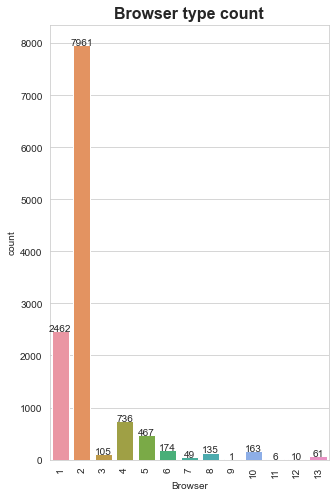

In [51]:
fig, ax1 = plt.subplots(figsize = (5,8))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="Browser", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Browser type count', weight='bold').set_fontsize(16)

- Browser 2 is the most used browser type while browser 13 is the least used. 

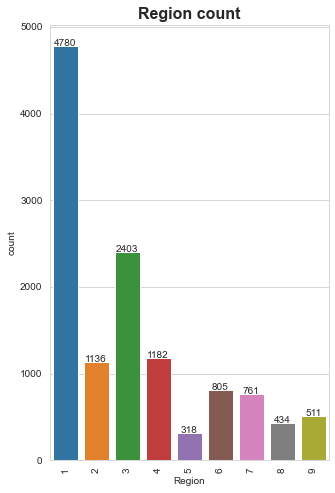

In [52]:
fig, ax1 = plt.subplots(figsize = (5,8))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="Region", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Region count', weight='bold').set_fontsize(16)

- Most shoppers are located in Region 1 while region 5 is the least region where online shoppers shop from. 

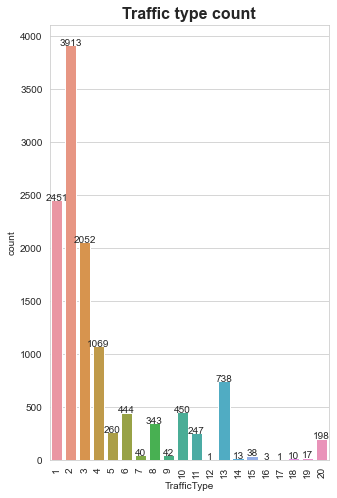

In [53]:
fig, ax1 = plt.subplots(figsize = (5,8))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="TrafficType", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Traffic type count', weight='bold').set_fontsize(16)

- Most users were categorised into traffic type 2. Only 1 user was categorised into traffic type 1. 

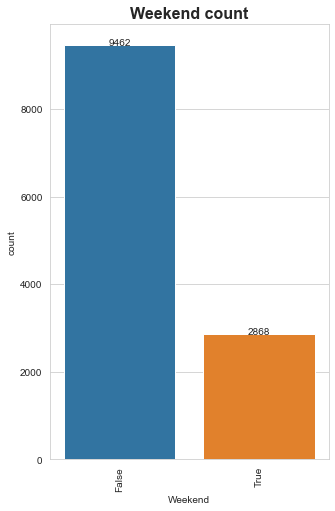

In [54]:
fig, ax1 = plt.subplots(figsize = (5,8))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="Weekend", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Weekend count', weight='bold').set_fontsize(16)

- Most sessions were not carried out during the weekends. Only 2868 transactions were carried out during weekends. 

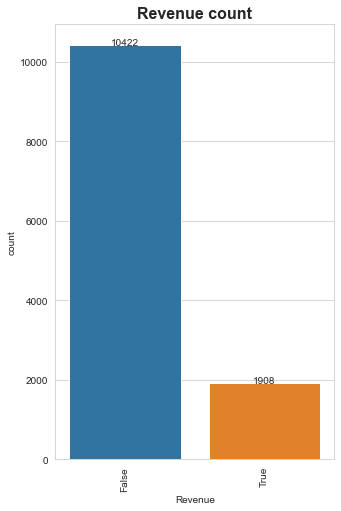

In [55]:
fig, ax1 = plt.subplots(figsize = (5,8))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="Revenue", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Revenue count', weight='bold').set_fontsize(16)

- Most transactions were not completed and only 1908 transactions ended in purchase. 

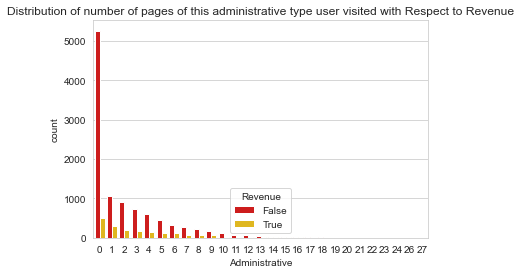

In [56]:
plt.title('Distribution of number of pages of this administrative type user visited with Respect to Revenue')
sns.countplot(x= 'Administrative', hue = 'Revenue', data = data, palette='hot')
plt.show()

- Transactions involving visits to zero administrative pages were the highest that did not end in purchase as well as those that ended in purchase. 

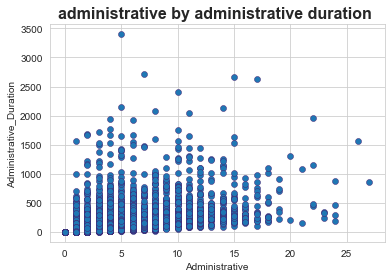

In [57]:
#Plot of administrative by adminstrative duration 
sns.scatterplot(x='Administrative', y='Administrative_Duration',data=df,palette = "#432371", edgecolor='#432371')
plt.title('administrative by administrative duration ', weight='bold').set_fontsize('16')

- The highest duration recorded for adminstrative pages was for 5 pages

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


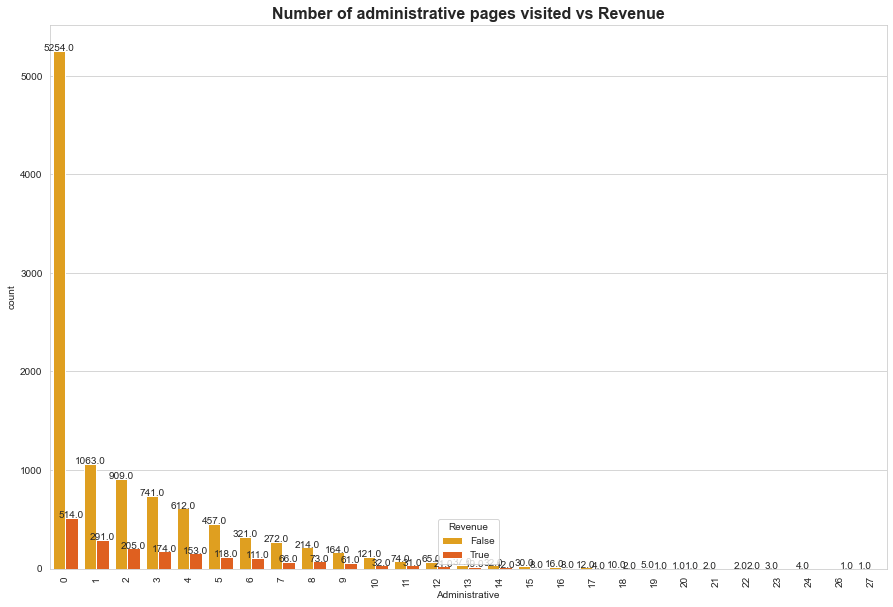

In [58]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'Administrative', hue = 'Revenue', data = df, palette='autumn_r')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Number of administrative pages visited vs Revenue', weight='bold', fontsize = 16)

- 5254 transactions that did not involve any visit to administrative pages did not end in purchase while 514 transactions which also did not involve any visit to administrative pages ended in purchase. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


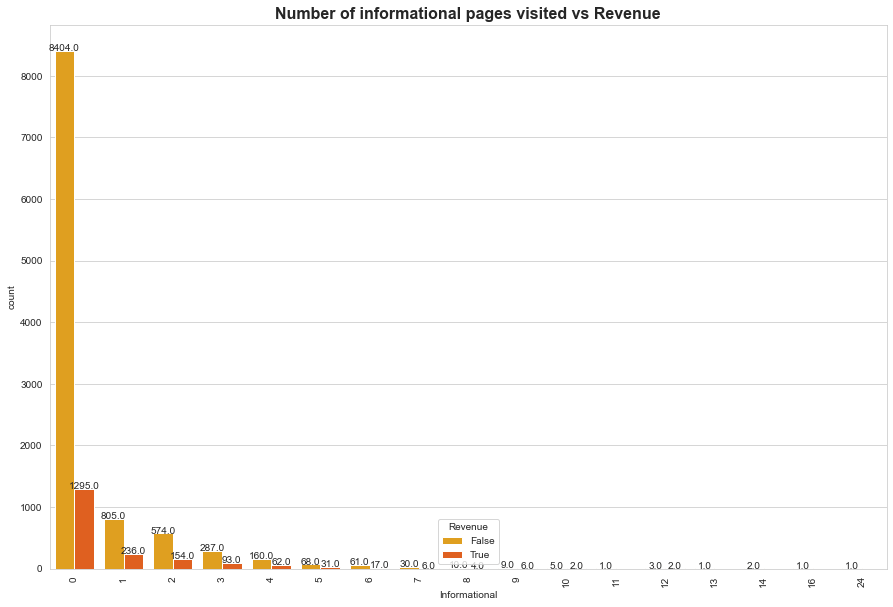

In [59]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'Informational', hue = 'Revenue', data = df, palette='autumn_r')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Number of informational pages visited vs Revenue', weight='bold', fontsize = 16)

- In relation to informational pages, the highest number of transactions that ended in purchase did not involve users visiting any informational page. 

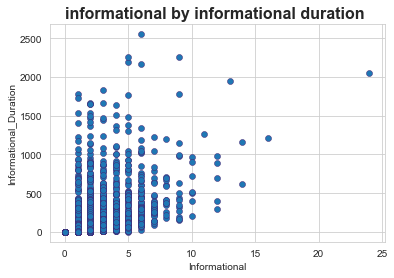

In [60]:
#Plot of informational by informational duration 
sns.scatterplot(x='Informational', y='Informational_Duration',data=df,palette = "#432371", edgecolor='#432371')
plt.title('informational by informational duration ', weight='bold').set_fontsize('16')

The highest duration recorded for informational pages was for 6 pages

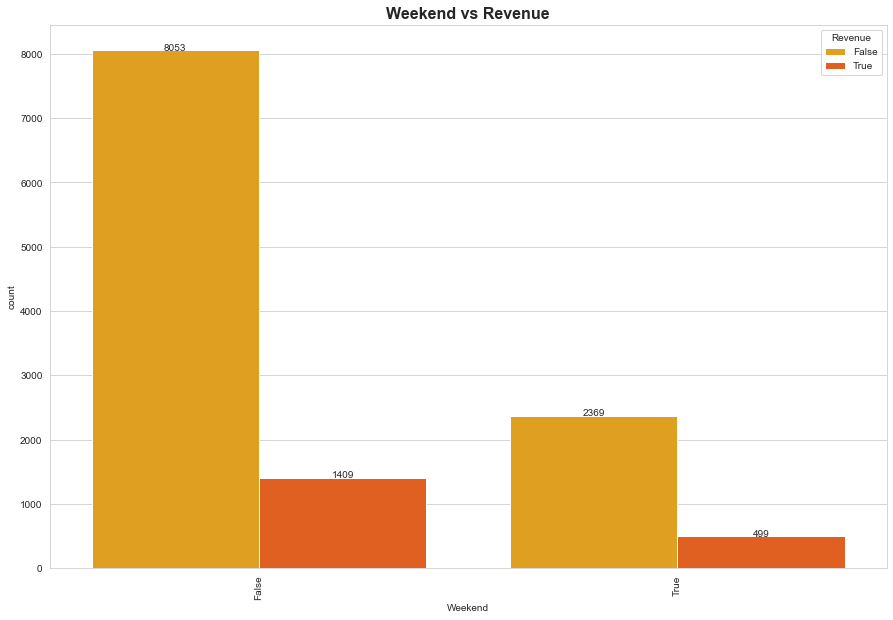

In [61]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'Weekend', hue = 'Revenue', data = df, palette='autumn_r')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Weekend vs Revenue', weight='bold', fontsize = 16)

- Most transactions that ended in purchase were not carried out during weekends. 

In [62]:
df.ProductRelated.value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

In [63]:
df.ProductRelated.describe()

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

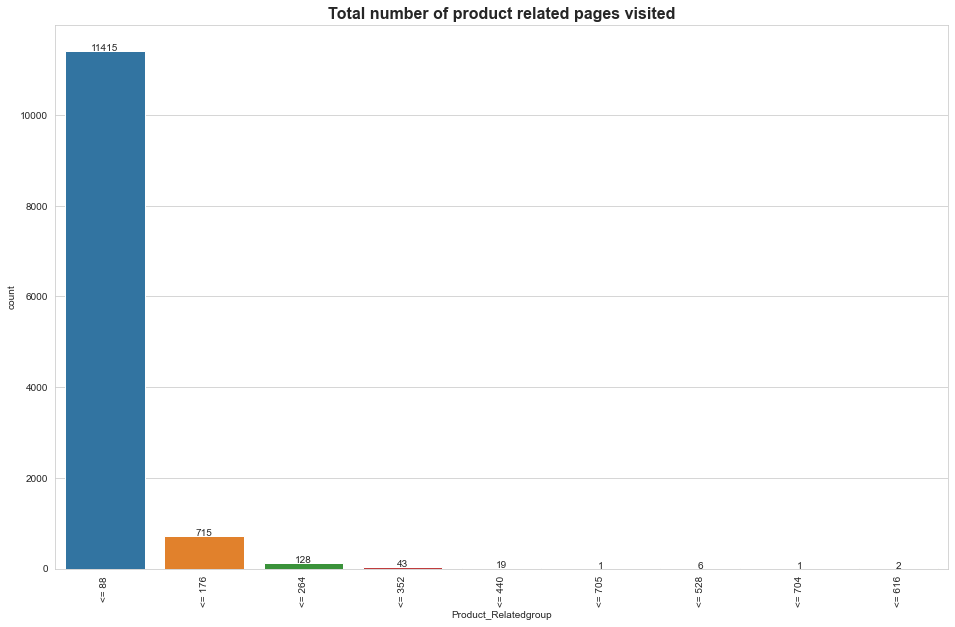

In [64]:
def productrelated_group(ProductRelated):
    if ProductRelated <= 88:
        return '<= 88'
    elif ProductRelated <= 176:
        return '<= 176'
    elif ProductRelated <= 264:
        return '<= 264'
    elif ProductRelated <= 352:
        return '<= 352'
    elif ProductRelated <= 440:
        return '<= 440'
    elif ProductRelated <= 528:
        return '<= 528'
    elif ProductRelated <= 616:
        return '<= 616'
    elif ProductRelated <= 704:
        return '<= 704'
    else:
        return '<= 705'
    
#recreate a new column for ProductRelated category
df['Product_Relatedgroup'] = df['ProductRelated'].apply(productrelated_group)

# Display values for each category
fig, ax1 = plt.subplots(figsize = (16,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x ="Product_Relatedgroup", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Total number of product related pages visited', weight='bold').set_fontsize(16)

- The highest number product related pages visited were <=88.

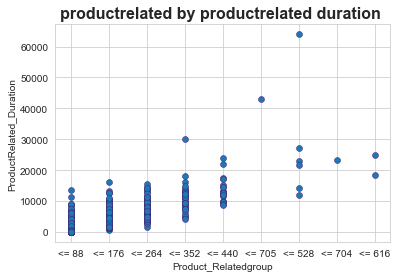

In [65]:
#Plot of productrelated by productrelated duration 
sns.scatterplot(x='Product_Relatedgroup', y='ProductRelated_Duration',data=df,palette = "#432371", edgecolor='#432371')
plt.title('productrelated by productrelated duration ', weight='bold').set_fontsize('16')

The highest duration recorded for productrelated pages was for <=528 pages. The higher the number of product related pages visited, the higher the duration spent. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


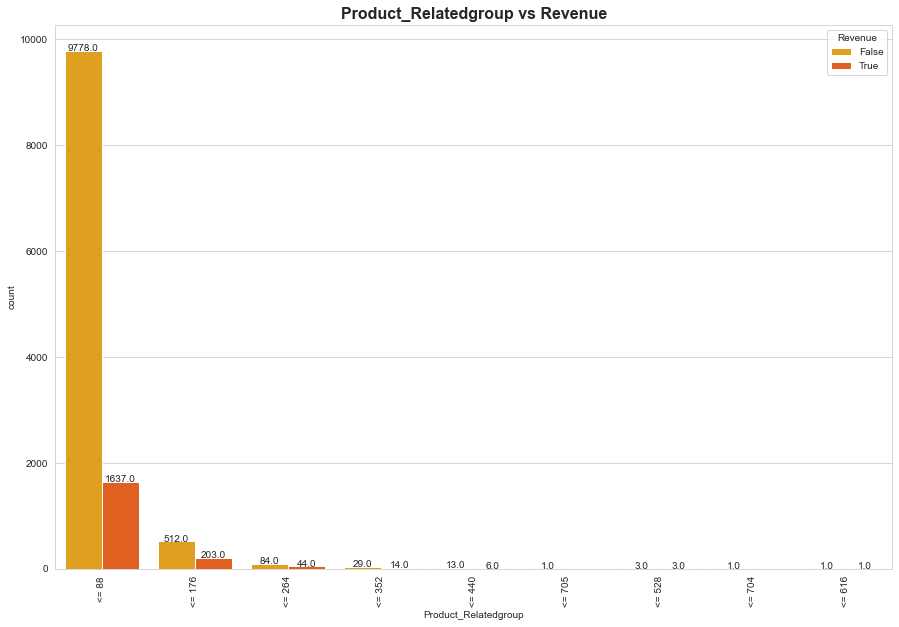

In [66]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'Product_Relatedgroup', hue = 'Revenue', data = df, palette='autumn_r')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Product_Relatedgroup vs Revenue', weight='bold', fontsize = 16)

- The higher the number of product related pages visited, the more likely the transaction did not end in purchase. 1637 transactions ended in purchase when<=88 product related pages were visited and only one transaction ended in purchase when <=616 product related pages were visited. 

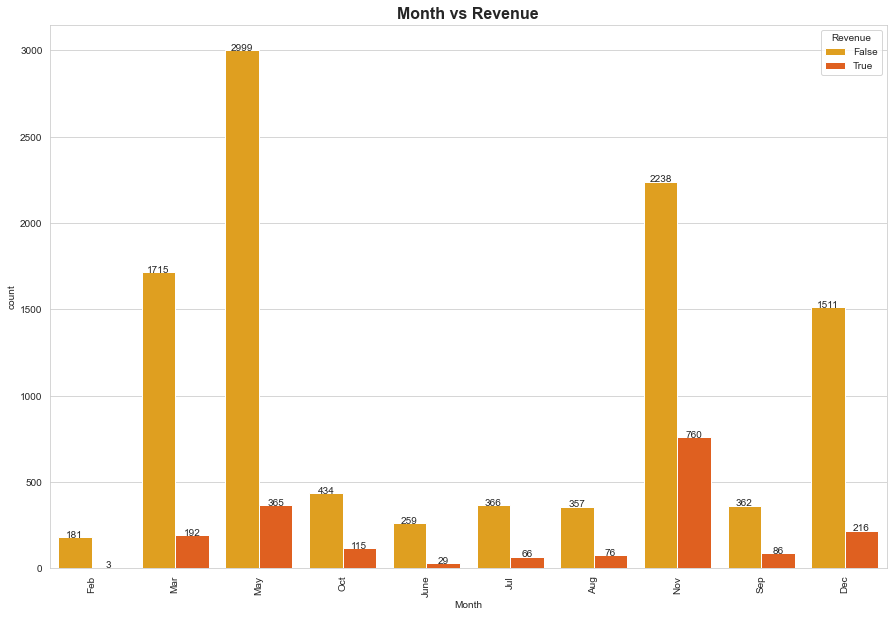

In [67]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'Month', hue = 'Revenue', data = df, palette='autumn_r')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Month vs Revenue', weight='bold', fontsize = 16)

The highest number of transactions that ended in purchase were recorded in November while the least transactions that ended in purchase were recorded in February. 

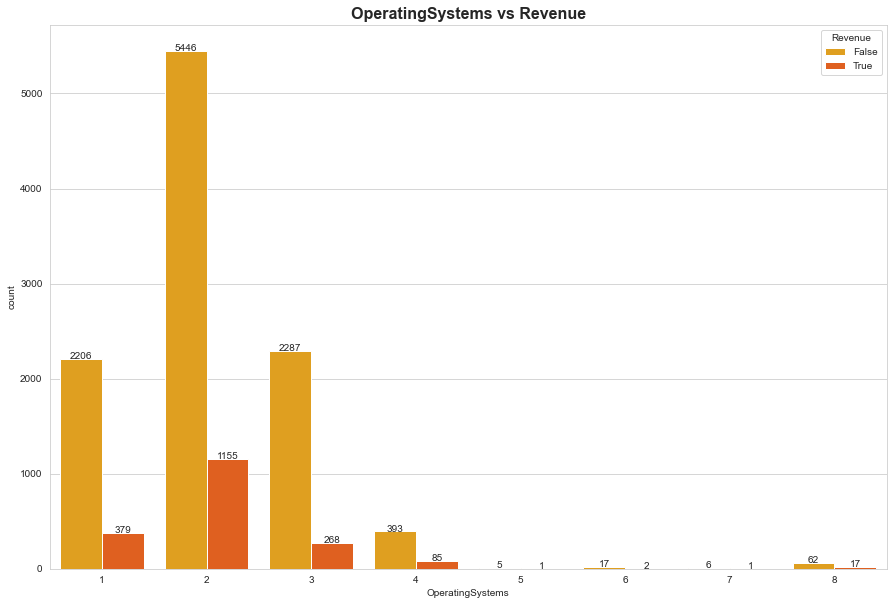

In [68]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'OperatingSystems', hue = 'Revenue', data = df, palette='autumn_r')
viz.set_xticklabels(viz.get_xticklabels(), rotation=360)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('OperatingSystems vs Revenue', weight='bold', fontsize = 16)

- The highest transactions that ended in purchase were recorded for users with operating system 2 and the least was for operating system 5 and 7

posx and posy should be finite values
posx and posy should be finite values


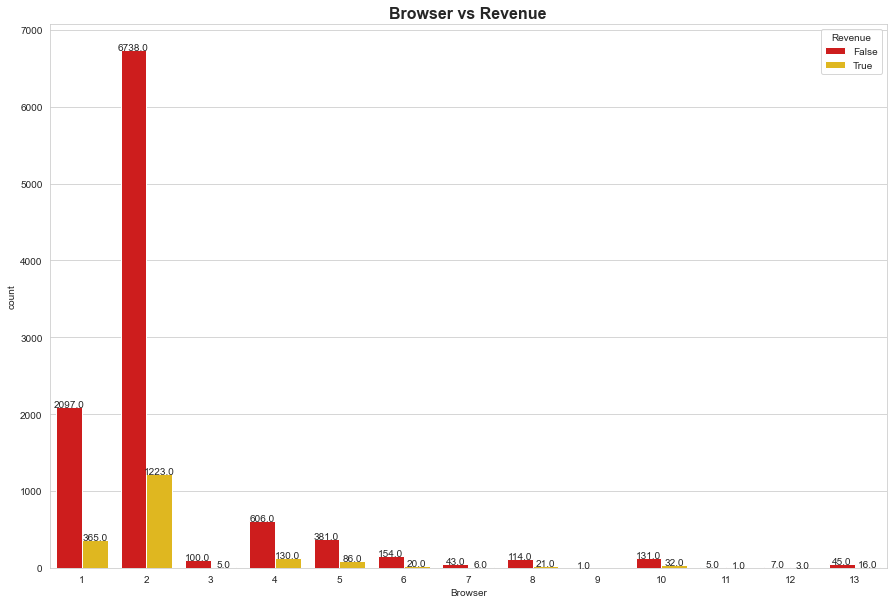

In [69]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'Browser', hue = 'Revenue', data = df, palette='hot')
viz.set_xticklabels(viz.get_xticklabels(), rotation=360)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Browser vs Revenue', weight='bold', fontsize = 16)

- The highest transactions that ended in purchase were recorded for users with browser type 2 and the least was for operating browser type 9 and 11

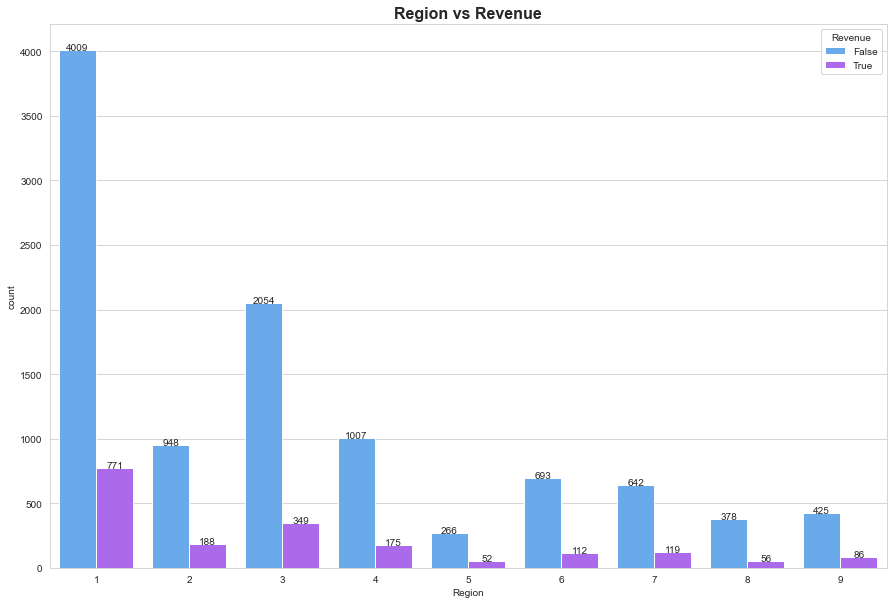

In [70]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'Region', hue = 'Revenue', data = df, palette='cool')
viz.set_xticklabels(viz.get_xticklabels(), rotation=360)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Region vs Revenue', weight='bold', fontsize = 16)

The highest transactions that ended in purchase were recorded for users in region 1 and the least was for region 5.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


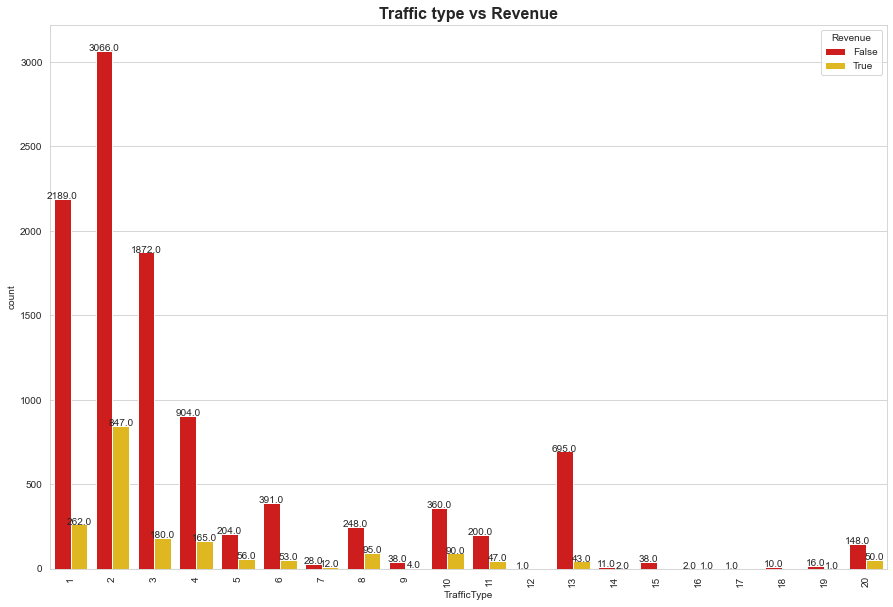

In [71]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'TrafficType', hue = 'Revenue', data = df, palette='hot')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Traffic type vs Revenue', weight='bold', fontsize = 16)

- The highest transactions that ended in purchase were recorded for users categorized under traffic type 2 and the least was for traffic type 19. 

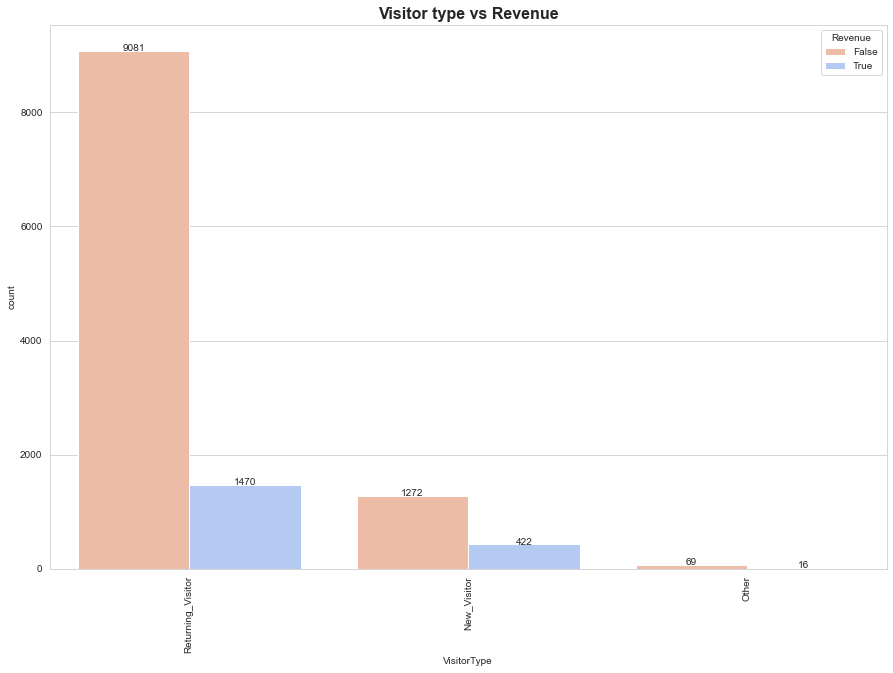

In [72]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'VisitorType', hue = 'Revenue', data = df, palette='coolwarm_r')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Visitor type vs Revenue', weight='bold', fontsize = 16)

- Transactions involving returning visitors were the highest transactions that ended in purchase while transactions involving other visitors were the least. 

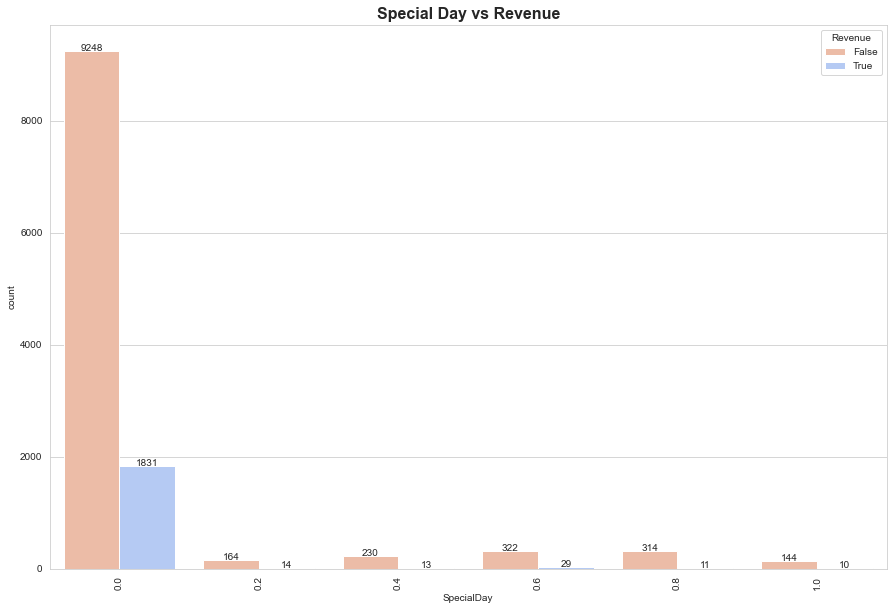

In [73]:
fig, ax1 = plt.subplots(figsize = (15,10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'SpecialDay', hue = 'Revenue', data = df, palette='coolwarm_r')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Special Day vs Revenue', weight='bold', fontsize = 16)

- Transactions with no proximity to special days were the highest transactions that ended in purchase. Only 10 transactions with high proximity to a special day ended in purchase. 

Text(0.5, 1.0, 'Revenue vs Productrelated duration')

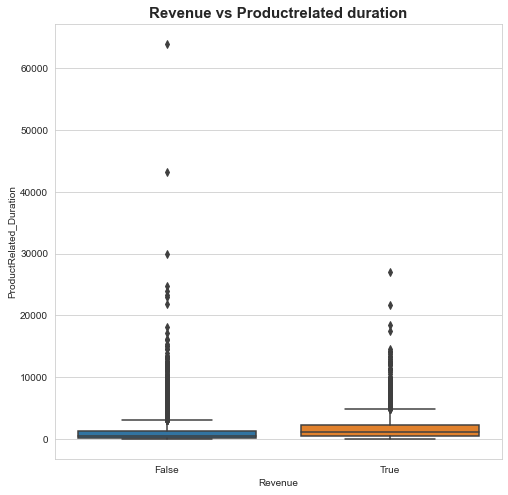

In [74]:
#Revenue vs Productrelated duration
fig, ax1 = plt.subplots(figsize = (8,8))
plt.ticklabel_format(style='plain')
viz = sns.boxplot(ax =ax1, x = "Revenue", y= 'ProductRelated_Duration', data = df)
plt.title('Revenue vs Productrelated duration', weight='bold', fontsize=15)

- Transactions that involved the highest duration on product related pages did not end in purchase. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

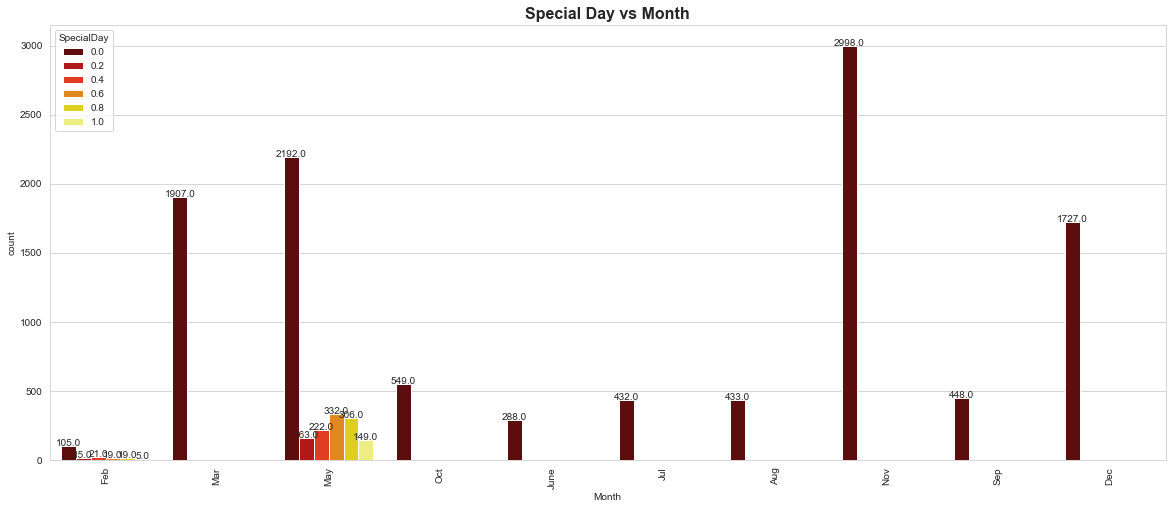

In [75]:
fig, ax1 = plt.subplots(figsize = (20,8))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x= 'Month', hue = 'SpecialDay', data = df, palette='hot')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Special Day vs Month', weight='bold', fontsize = 16)

<AxesSubplot:>

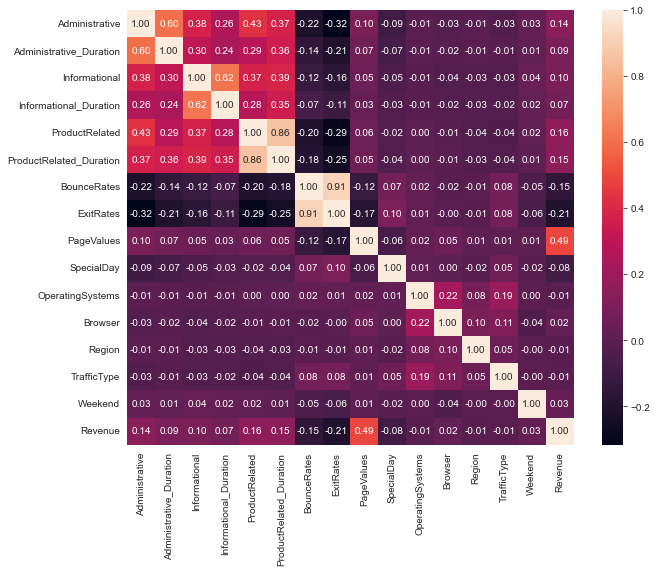

In [76]:
# Correlation between numeric columns
core = df.corr()
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(core, annot=True, fmt='.2f')

- there is a high positive correlation between bounce rates and exit rates.
- there is a high positive correlation between the number of product related pages visited and the duration spent on such pages.
- there is a positive correlation between informational  and informational duration. 
- there is a positive correlation between administrative and administrative duration.
- there is a low positive correlation between pagevalues and revenue.

### MODELLING

In [77]:
y = df['Revenue']

In [78]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

In [79]:
df['Revenue'] = (df['Revenue'] == 'True').astype(int)

In [80]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Product_Relatedgroup
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0,<= 88
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0,<= 88
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0,<= 88
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0,<= 88
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0,<= 88


In [81]:
#one hot encode the categorical column using pd.get_dummies()
category_dummies = pd.get_dummies(df['VisitorType'])
category_dummies.head()

,New_Visitor,Other,Returning_Visitor
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [82]:
#one hot encode the categorical column using pd.get_dummies()
category_dummies = pd.get_dummies(df['Month'], ['VisitorType'])
category_dummies.head()

,['VisitorType']_Aug,['VisitorType']_Dec,['VisitorType']_Feb,['VisitorType']_Jul,['VisitorType']_June,['VisitorType']_Mar,['VisitorType']_May,['VisitorType']_Nov,['VisitorType']_Oct,['VisitorType']_Sep
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [83]:
#JOINING ONE-HOT CODED COLUMNS TO THE MAIN DATAFRAME WITH pd.concat
df = pd.concat([df,category_dummies], axis=1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,['VisitorType']_Aug,['VisitorType']_Dec,['VisitorType']_Feb,['VisitorType']_Jul,['VisitorType']_June,['VisitorType']_Mar,['VisitorType']_May,['VisitorType']_Nov,['VisitorType']_Oct,['VisitorType']_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
#dropping the original categorical columns and new columns grouped and created for visualization
features = ['VisitorType', 'Month', 'Product_Relatedgroup']
df = df.drop(features, axis=1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,['VisitorType']_Aug,['VisitorType']_Dec,['VisitorType']_Feb,['VisitorType']_Jul,['VisitorType']_June,['VisitorType']_Mar,['VisitorType']_May,['VisitorType']_Nov,['VisitorType']_Oct,['VisitorType']_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [85]:
X = df.drop('Revenue', axis=1)
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,['VisitorType']_Aug,['VisitorType']_Dec,['VisitorType']_Feb,['VisitorType']_Jul,['VisitorType']_June,['VisitorType']_Mar,['VisitorType']_May,['VisitorType']_Nov,['VisitorType']_Oct,['VisitorType']_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


### IMPORT ML ALGORITHMS

In [86]:
#import ML algorithms
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import sklearn.svm as svm


# Ml metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# To disbale warning
import warnings
warnings.filterwarnings('ignore')

### Train, Test and Split

In [87]:
# Split into training and testing with split ratio of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
#import StandardScaler
from sklearn.preprocessing import StandardScaler

In [89]:
#data scaling steps for train dataset
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [90]:
#data scaling steps for test dataset
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [91]:
# Initialize the algorithms
LR= LogisticRegression()
KN = KNeighborsClassifier(n_neighbors=5,weights='distance')
RF = RandomForestClassifier()
SVM = svm.LinearSVC()

In [92]:
models = [LR,KN,RF,SVM]

In [93]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='autumn',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [94]:
print('\n',X_train.head(3))
print('\n',X_test.head(3))
print('\n',y_train.head(3))
print('\n',y_test.head(3))


        Administrative  Administrative_Duration  Informational  \
1785        -0.698469                -0.456937      -0.397412   
10407       -0.091848                -0.378064      -0.397412   
286         -0.698469                -0.456937      -0.397412   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
1785                -0.245168       -0.555129                -0.573313   
10407               -0.245168        1.105528                 0.127204   
286                 -0.245168       -0.689777                -0.622722   

       BounceRates  ExitRates  PageValues  SpecialDay  ...  \
1785     -0.155336   0.403282   -0.315593   -0.308364  ...   
10407    -0.404284  -0.599555   -0.165744   -0.308364  ...   
286       3.757227   3.290124   -0.315593   -0.308364  ...   

       ['VisitorType']_Aug  ['VisitorType']_Dec  ['VisitorType']_Feb  \
1785             -0.192935            -0.404499            -0.119117   
10407            -0.192935            -0.404499

In [95]:
#view data type of each column
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Weekend                       bool
Revenue                      int32
['VisitorType']_Aug          uint8
['VisitorType']_Dec          uint8
['VisitorType']_Feb          uint8
['VisitorType']_Jul          uint8
['VisitorType']_June         uint8
['VisitorType']_Mar          uint8
['VisitorType']_May          uint8
['VisitorType']_Nov          uint8
['VisitorType']_Oct          uint8
['VisitorType']_Sep          uint8
dtype: object


### TRAIN AND TEST MODELS


For LogisticRegression, Accuracy score is 0.8726682887266829 

              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2055
        True       0.76      0.35      0.48       411

    accuracy                           0.87      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



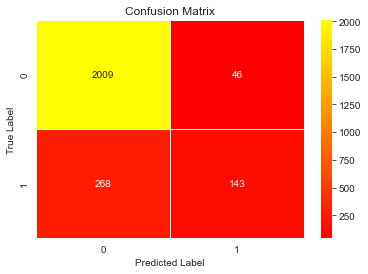


For KNeighborsClassifier, Accuracy score is 0.8726682887266829 

              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2055
        True       0.72      0.38      0.50       411

    accuracy                           0.87      2466
   macro avg       0.80      0.68      0.71      2466
weighted avg       0.86      0.87      0.86      2466



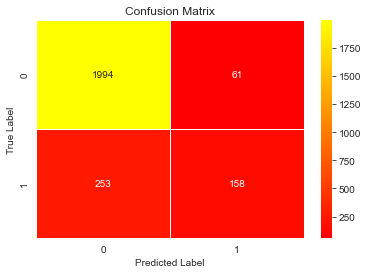


For RandomForestClassifier, Accuracy score is 0.8953771289537713 

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2055
        True       0.75      0.56      0.64       411

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



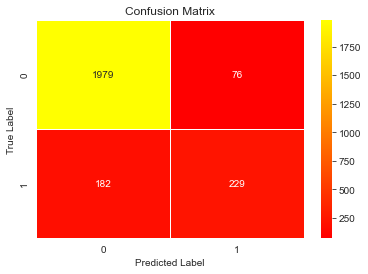


For LinearSVC, Accuracy score is 0.8694241686942417 

              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2055
        True       0.77      0.31      0.44       411

    accuracy                           0.87      2466
   macro avg       0.82      0.65      0.68      2466
weighted avg       0.86      0.87      0.85      2466



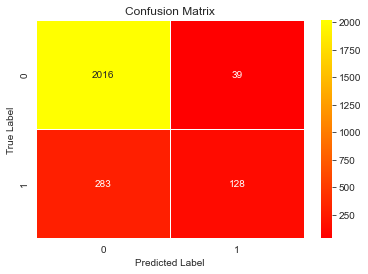

In [96]:
#create function to train a model and evaluate accuracy
def my_train(model,X_train,y_train,X_test,y_test):
    
    #fit your model
    model.fit(X_train,y_train)
    
    #predict on the fitted model
    prediction = model.predict(X_test)
    
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    confusion_matrix(y_test,prediction,labels=model.classes_)
    ConfusionMatrixDisplay(confusion_matrix,display_labels=model.classes_)

#loop through each model
for model in models:
    my_train(model,X_train,y_train,X_test,y_test)

### EVALUATION USING CROSS VALIDATION

In [97]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, cross_val_score


# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)


For LogisticRegression, Accuracy score is 0.8726682887266829 

              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2055
        True       0.76      0.35      0.48       411

    accuracy                           0.87      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



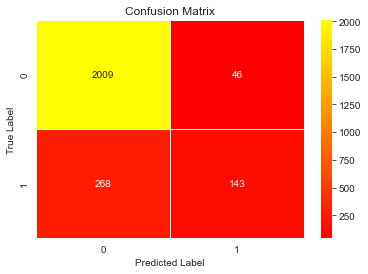


For KNeighborsClassifier, Accuracy score is 0.8726682887266829 

              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2055
        True       0.72      0.38      0.50       411

    accuracy                           0.87      2466
   macro avg       0.80      0.68      0.71      2466
weighted avg       0.86      0.87      0.86      2466



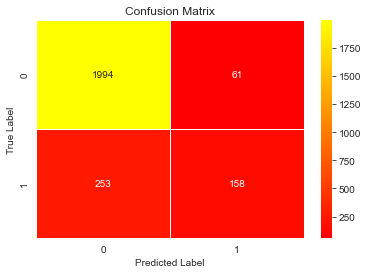


For RandomForestClassifier, Accuracy score is 0.8937550689375506 

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2055
        True       0.74      0.56      0.64       411

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.89      0.89      2466



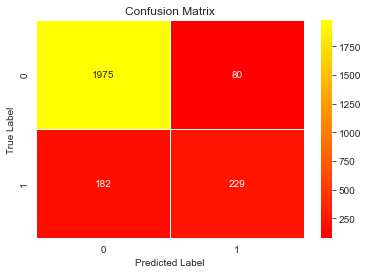


For LinearSVC, Accuracy score is 0.8682076236820763 

              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2055
        True       0.76      0.30      0.43       411

    accuracy                           0.87      2466
   macro avg       0.82      0.64      0.68      2466
weighted avg       0.86      0.87      0.84      2466



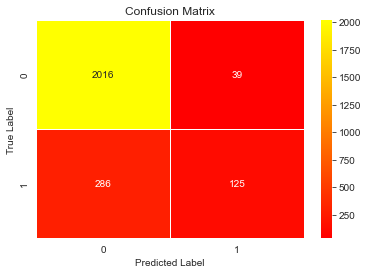

In [98]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    
    score = ['accuracy', 'precision', 'recall']
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=score, cv=cv, n_jobs=-1)
    
    # report performance
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,mean(scores)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    
#loop through each model
for model in models:
    my_train(model,X_train,y_train,X_test,y_test)

### SUMMARY OF FINDINGS

- The higher the number of product related, administrative and informational pages visited, the less likely it is that the transaction will end in purchase.

- The highest transactions that ended in purchase were recorded when 0 number of administrative and informational were visited. In the same vein, the highest transactions that didn't end in purchase were also recorded when 0 number of administrative and informational pages were visited. 

- Most transactions were not carried out during proximity to special days.

- The highest transactions that ended in purchase and the highest transactions that didn't end in purchase were recorded for users in region 1.

- The highest number of transactions: 2999 occured in May but the highest number of transactions: 760 that ended in purchase occurred in November. The second highest transactions;365 that ended in purchase occured in May. 

- 10422 transactions ended in purchase while only 1908 transactions ended in purchase. 85% of these 1908 transactions occurred when <=88 producted related pages were visited. 


### INTERPRETATION OF RESULTS

Our models are all within 80% accuracy, however this does not imply that they are the best because our target class(Revenue) is not equal. 

The goal of this project is to create a model that will rightly label transations that will end in purchase, so we will choose the model with the highest recall which is, **Random Forest Classifier model**.  